### - Use this dataset on house price prediction in kaggle, perform EDA on it and then predict the house prices using linear regression.


In [174]:
import pandas as pd

df = pd.read_csv("../../data/house_data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [175]:
df.shape, df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [176]:
df = df[df["price"] > 0]
df.shape

(4551, 18)

In [177]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [178]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
122,2014-05-05 00:00:00,2280000.0,7.0,8.0,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,WA 98053,USA


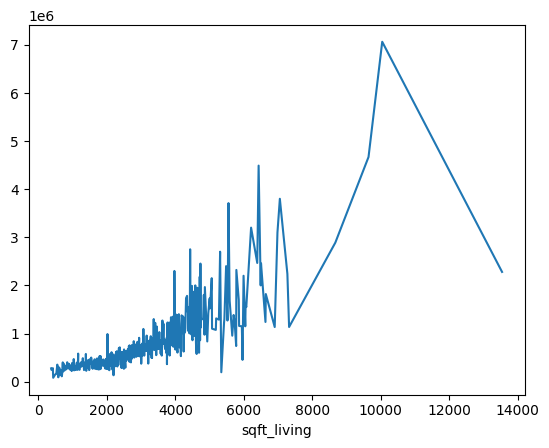

In [179]:
df.groupby("sqft_living")["price"].median().plot()

df[df["sqft_living"] > 12000]

<Axes: xlabel='sqft_lot'>

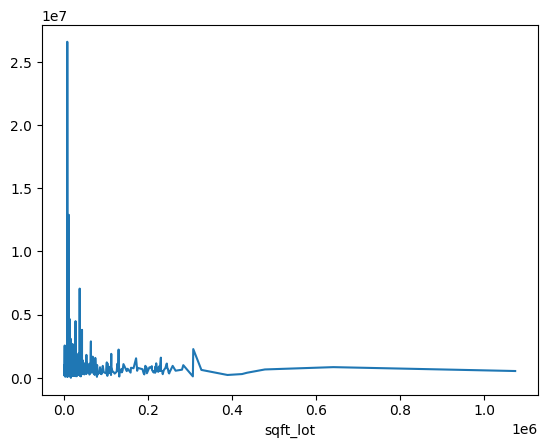

In [180]:
df.groupby("sqft_lot")["price"].mean().plot()

<Axes: xlabel='yr_built'>

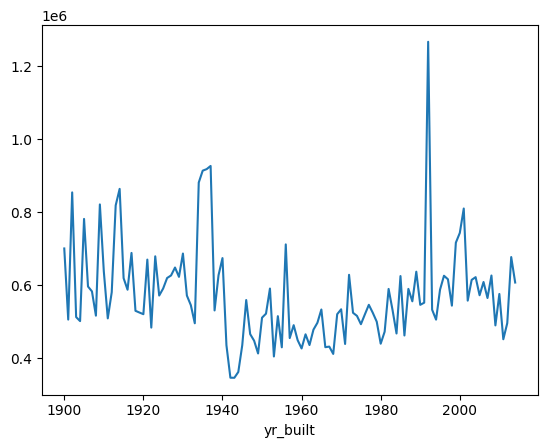

In [181]:
df.groupby("yr_built")["price"].mean().plot()

<Axes: xlabel='yr_renovated'>

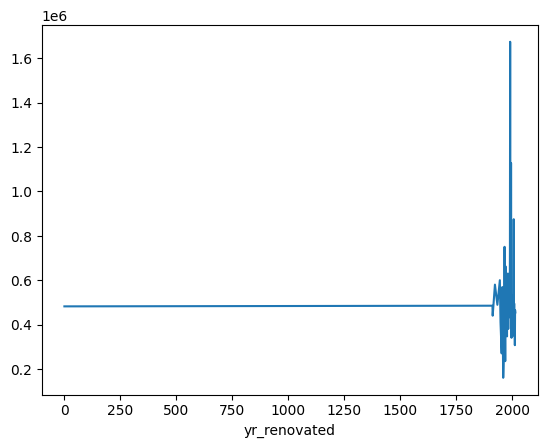

In [182]:
df.groupby("yr_renovated")["price"].median().plot()


<Axes: xlabel='condition'>

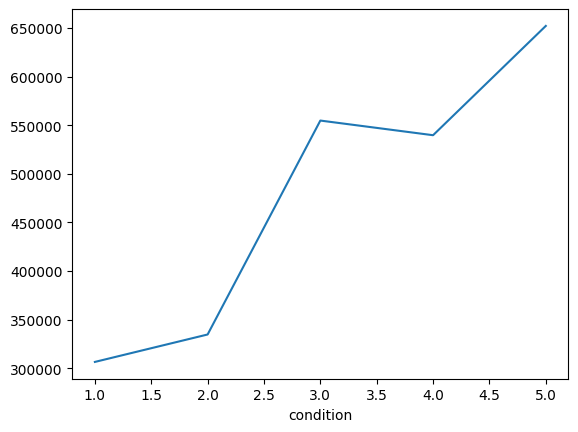

In [183]:
df.groupby("condition")["price"].mean().plot()

<Axes: xlabel='sqft_total'>

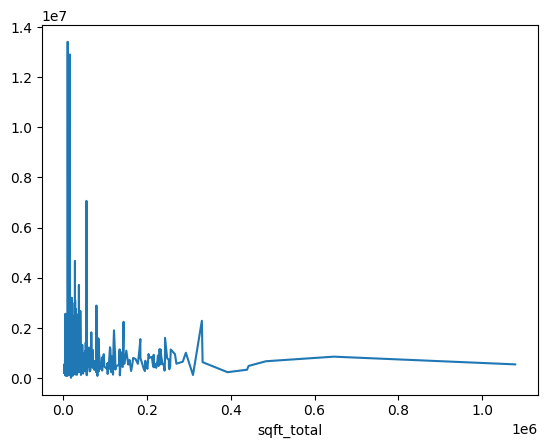

In [184]:
df["sqft_total"] = df["sqft_living"] + df["sqft_lot"] + df["sqft_above"] 

df.groupby("sqft_total")["price"].mean().plot()
# df

### - You can drop the categorical features and the date columns. Then try ElasticNetCV and RidgeCV on the same dataset. 
- sqft verkar inte ha så mycket med price att göra direkt vad man kan se av graf, se ovan

In [185]:
df.drop(columns="sqft_total",inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [186]:
# ändra yr_renovaded, om den är 0 gör = yr_built
df["yr_renovated"] = df.apply(lambda row: row["yr_built"] if not row["yr_renovated"] else row["yr_renovated"], axis= 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [187]:
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error
import numpy as np

# np.random.seed(0)
# X = np.random.rand(100,3) # 3 features
# y = 3*X[:,0] - 2*X[:,1] + 1.5*X[:,2] + np.random.randn(100)*0.1
df.drop(columns=['date','street', 'city','statezip', 'country'], inplace=True)

X, y = df.drop(columns="price"), df["price"]
# df.columns
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [188]:
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

### Man kan ta bort outliers, men då blir inte algoritmen bra för att förutspå just outliers. Man om man gör det så kan man se till att inkommande data bara finns inom det spannet som modellen är tränad på

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3049, 12), (1502, 12), (3049,), (1502,))

In [190]:
X_train.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1298,2.0,2.50,750,1430,2.0,0,0,3,750,0,2006,2006
3663,4.0,3.00,2440,9664,2.0,0,0,3,1890,550,1981,2013
898,3.0,2.25,2030,7350,1.0,0,0,4,1190,840,1977,1977
4085,4.0,1.75,2100,11942,1.0,0,0,3,1030,1070,1964,2000
4176,3.0,1.50,1460,9908,1.0,0,0,3,1460,0,1952,2008


In [191]:
y_train.head()

1298    375000.0
3663    480000.0
898     588000.0
4085    368000.0
4176    310000.0
Name: price, dtype: float64

## Scale dataset

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #denna skalar med medelvärde på 0, std 1. minmaxscaler går mellan 0-1
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) #transformera datan med den scalade X_train datan
scaled_X_test = scaler.transform(X_test) #transformera datan med den scalade X_train datan

In [193]:
scaled_X_train.mean(), scaled_X_train.std()

(np.float64(-1.722077650965532e-16), np.float64(1.0))

In [194]:
scaled_X_test.mean(), scaled_X_test.std()

(np.float64(0.02375555098138583), np.float64(1.0371959704913507))

## Linear Regression

In [195]:
model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [196]:
model.fit(X_train, y_train)

print(f"Parameters: {model.coef_}") #våra parametrar, w1, w2, w3 - våra weights/parameters/coefficents
print(f"Intercept: {model.intercept_}") #intercept = skärpunkt på y-axel. (m)

Parameters: [-6.48238098e+04  7.22007460e+04  1.70778459e+02 -7.79344423e-01
  1.89194822e+04  5.00391769e+05  5.24072951e+04  5.41273224e+04
  1.14638081e+02  5.61403781e+01 -2.68643996e+03  7.44499141e+02]
Intercept: 3634630.7838027393


In [197]:
y_pred = model.predict(X_test)
y_pred[:5]

array([1373734.35876034,  587425.56215548,  659285.78581539,
        282068.84938502,  525349.11937628])

In [198]:
y_test.iloc[:5]

471     1225000.0
2518     496752.0
23       612500.0
3922     265000.0
135      615000.0
Name: price, dtype: float64

In [199]:
mae = mean_absolute_error (y_test, y_pred)
mse = mean_squared_error (y_test, y_pred)
rmse = root_mean_squared_error (y_test, y_pred)
print(f"{mae = }")
print(f"{mse = }")
print(f"{rmse = }")

metrics_linear = {"MAE": mae,
                "MSE": mse,
                "RMSE": rmse}
metrics_linear

mae = 158489.1797744029
mse = 53409525882.62814
rmse = 231105.0105095693


{'MAE': 158489.1797744029, 'MSE': 53409525882.62814, 'RMSE': 231105.0105095693}

In [200]:
df_metrics = pd.DataFrame(metrics_linear.items(), columns=["Type", "Value"])
df_metrics

,Type,Value
0,MAE,1.584892e+05
1,MSE,5.340953e+10
2,RMSE,2.311050e+05


## RidgeCV

In [201]:
ridge = RidgeCV() #testar olika alpha
ridge

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,None
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [202]:
ridge.fit(X_train, y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,None
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [203]:
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge[:3]

array([1373945.79792643,  589189.14392187,  659965.89616789])

In [204]:
y_test.iloc[:3]

471     1225000.0
2518     496752.0
23       612500.0
Name: price, dtype: float64

In [205]:
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = root_mean_squared_error(y_test, y_pred_ridge)



metrics_ridge = {
    "MAE" : mae, 
    "MSE": mse, 
    "RMSE": rmse 
}
metrics_ridge

{'MAE': 158724.82091258556,
 'MSE': 53531265796.828186,
 'RMSE': 231368.24716634775}

In [206]:
df_metrics = pd.DataFrame([metrics_linear, metrics_ridge], index=["Linear", "Ridge"])
df_metrics

,MAE,MSE,RMSE
Linear,158489.179774,5.340953e+10,231105.010510
Ridge,158724.820913,5.353127e+10,231368.247166


## ElasticNetCV

In [207]:
elastic = ElasticNetCV()
elastic

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,None
,copy_X,True
,verbose,0


In [208]:
elastic.fit(X_train, y_train)

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,None
,copy_X,True
,verbose,0


In [209]:
y_pred_elastic = elastic.predict(X_test)
y_pred_elastic[:3]

array([1066785.21167617,  516122.95642793,  680645.67265764])

In [210]:
y_test.iloc[:3]

471     1225000.0
2518     496752.0
23       612500.0
Name: price, dtype: float64

In [211]:
mae = mean_absolute_error(y_test, y_pred_elastic)
mse = mean_squared_error(y_test, y_pred_elastic)
rmse = root_mean_squared_error(y_test, y_pred_elastic)

metrics_elastic = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
} #, index="Elastic"
metrics_elastic

{'MAE': 176069.3348617726, 'MSE': 71622184460.68286, 'RMSE': 267623.2136057761}

### - Record the scores in a dataframe with the columns mae, mse, rmse so you can compare the models.

In [212]:
df_metrics = pd.DataFrame([metrics_linear, metrics_ridge, metrics_elastic], index=["Linear", "Ridge", "Elastic"])
df_metrics

,MAE,MSE,RMSE
Linear,158489.179774,5.340953e+10,231105.010510
Ridge,158724.820913,5.353127e+10,231368.247166
Elastic,176069.334862,7.162218e+10,267623.213606


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #denna skalar med medelvärde på 0, std 1. minmaxscaler går mellan 0-1
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) #transformera datan med den scalade X_train datan
scaled_X_test = scaler.transform(X_test) #transformera datan med den scalade X_train datan

result = []

models = {
    "LinearRegression": LinearRegression(),
    "RidgeCV": RidgeCV(),#alphas=[0.1, 1.0, 10.0], cv=5),
    "ElasticNetCV": ElasticNetCV() #l1_ratio=[.1, .5, .9], cv=5)
}

#loopa för att få ut alla modellers metrics samtidigt
for key, model in models.items(): 
    model.fit(scaled_X_train, y_train) # fit/träna modellen på träningsdatan
    y_pred = model.predict(scaled_X_test) #predicta på X-testdata
    
    #Hämta ut metrics på Y:s data(Target). Test datan och Prediction datan, och räkna ut dom mot varandra. 
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    prediction = y_pred[0] 
    answer = y_test.iloc[0]
    diff =  prediction - answer
    result.append([key, mae, mse, rmse, prediction, answer, diff])
    
df_metric = pd.DataFrame(result, columns=["model", "MAE", "MSE", "RMSE","prediction[0]", "answer[0]", "prediction_diff[0]"])
df_metric


,model,MAE,MSE,RMSE,prediction,answer[0],prediction_diff[0]
0,LinearRegression,158489.179774,5.340953e+10,231105.010510,1.373734e+06,1225000.0,148734.358762
1,RidgeCV,158381.356283,5.336059e+10,230999.120607,1.371476e+06,1225000.0,146475.515042
2,ElasticNetCV,236200.224747,1.231883e+11,350981.904204,5.728818e+05,1225000.0,-652118.183566


<Axes: xlabel='model'>

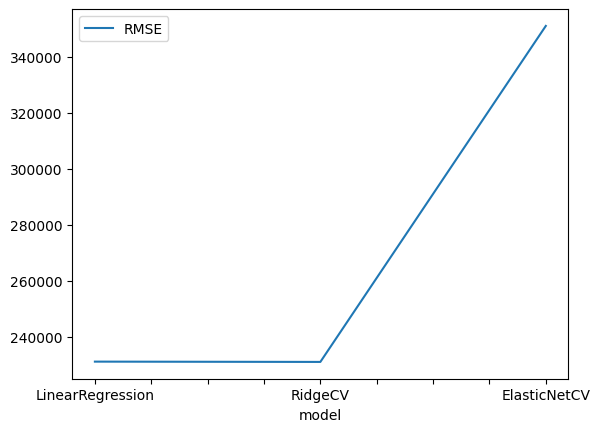

In [214]:
df_metric.plot(x="model", y=["RMSE"], kind="line")

In [215]:
df_metric

,model,MAE,MSE,RMSE,prediction,answer[0],prediction_diff[0]
0,LinearRegression,158489.179774,5.340953e+10,231105.010510,1.373734e+06,1225000.0,148734.358762
1,RidgeCV,158381.356283,5.336059e+10,230999.120607,1.371476e+06,1225000.0,146475.515042
2,ElasticNetCV,236200.224747,1.231883e+11,350981.904204,5.728818e+05,1225000.0,-652118.183566
